# Customer Churn Analysis

## Context

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.


## Deliverables - What is expected

### Week 1

A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.



<ol>
    <li>How much is churn affecting the business? How big is churn compared to the existing customer base?</li>
    <li>
        Explain churn by the below categories. Are there any factors that combine to be especially impactful? 
         <ul>
            <li> a- Customer demographics like age and gender </li>
            <li> b- Services used </li>
            <li> c- Billing information </li>
    </ul>
       </li>
  <li>What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers? </li>
    <li> <b>Bonus!</b> How long will it take for the company to lose all its customers?  Which demographics will they lose first?</li>


</ol>



## Deliverables

### Imports all librairies need


In [10]:
# for data preprocessing and dataframe computation
import pandas as pd 
# for matrix and vector transformation and computation
import numpy as np 
# for plotting and graph and viz
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessiong 
from sklearn.preprocessing import LabelEncoder, StandardScaler
# for data modeling ,testing and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Improve data preprocessing

In [12]:
# import dataset
data_churn = pd.read_csv("datasets/churn_dataset.csv")

In [13]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [16]:
data_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
data_churn.shape

(7043, 21)

In [19]:
data_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

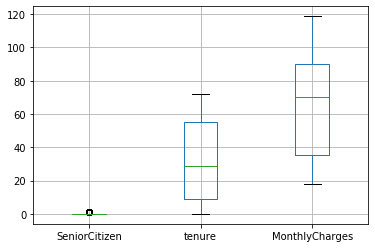

In [20]:
data_churn.boxplot()

In [21]:
data_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### How much is churn affecting the business? How big is churn compared to the existing customer base?

In [28]:
df = data_churn[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df['MonthlyCharges'].sum()
df

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


In [31]:
df = data_churn[['Churn']].groupby(['Churn']).size()/data_churn['Churn'].count()
df

Churn
No     0.73463
Yes    0.26537
dtype: float64

In [33]:
df_churned = data_churn[data_churn.Churn == 'Yes']
df_churned.MonthlyCharges.sum()

139130.85

In [48]:
data_churn[['TotalCharges']].sum()

TotalCharges    29.851889.5108.151840.75151.65820.51949.4301.9...
dtype: object

In [ ]:
### covert totalcharges in flot 


## Explain churn by the below categories. Are there any factors that combine to be especially impactful? 

In [51]:
churn_yes =  data_churn[data_churn['Churn'] == 'Yes']

In [52]:
churn_yes.shape

(1869, 21)

In [61]:
churn_yes[['gender','SeniorCitizen']].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns ={0:"count"}).reset_index()

,gender,SeniorCitizen,count
0,Female,0,699
1,Female,1,240
2,Male,0,694
3,Male,1,236


In [64]:
churn_yes[['Dependents','SeniorCitizen']].groupby(['Dependents','SeniorCitizen']).size().to_frame().rename(columns ={0:"count"}).reset_index()

,Dependents,SeniorCitizen,count
0,No,0,1089
1,No,1,454
2,Yes,0,304
3,Yes,1,22


Text(0.5, 1.0, 'yyyy')

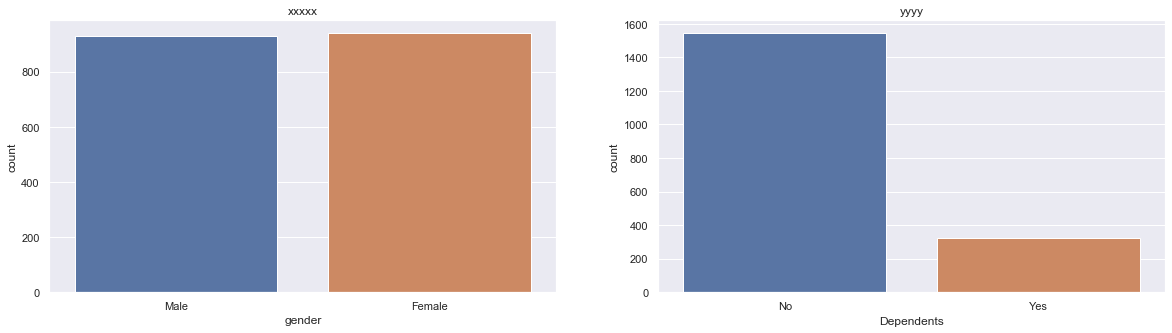

In [134]:
fig,axes =plt.subplots(1,2,figsize =(20,5))
sns.set(style="darkgrid")
ax1 = sns.countplot(x="gender", data=churn_yes ,ax=axes[0])
ax2  = sns.countplot(x="Dependents" , data=churn_yes ,ax=axes[1])
ax1.set_title("xxxxx")
ax2.set_title("yyyy")

In [76]:
ustomerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.091444,0.148682
tenure,0.091444,1.000000,0.401286
MonthlyCharges,0.148682,0.401286,1.000000


In [108]:
columns= data_churn.columns [data_churn.columns.dtype == 'object']
ignore_col = ['customerID','TotalCharges']
columns = columns[0]
columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [113]:
num_cat   = [x for x in columns if x not in ignore_col]



In [114]:
num_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [115]:
categorical = data_churn[num_cat]

In [116]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [118]:
#### sexe
# Female -> 1
# Male  -> 0
dict_gender = {"Female": 1, "Male": 0}
categorical['gender'] =categorical['gender'].replace(dict_gender)

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [119]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [120]:
set(categorical['MultipleLines'])

{'No', 'No phone service', 'Yes'}

In [121]:
dict_mult= {'No': 0,"Yes":1, "No phone service" : 2}

In [122]:
categorical['MultipleLines'] =categorical['MultipleLines'].replace(dict_mult)

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,Yes,No,1,No,2,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,0,No,No,34,Yes,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,0,No,No,2,Yes,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,0,No,No,45,No,2,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,1,0,No,No,2,Yes,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [128]:
dict_churn= {'No': 0,"Yes":1}

In [129]:
categorical['Churn'] =categorical['Churn'].replace(dict_churn)

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
data_churn[num_cat] =categorical[num_cat]

In [132]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,2,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,No,No,34,Yes,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,No,No,2,Yes,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,No,No,45,No,2,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,No,No,2,Yes,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


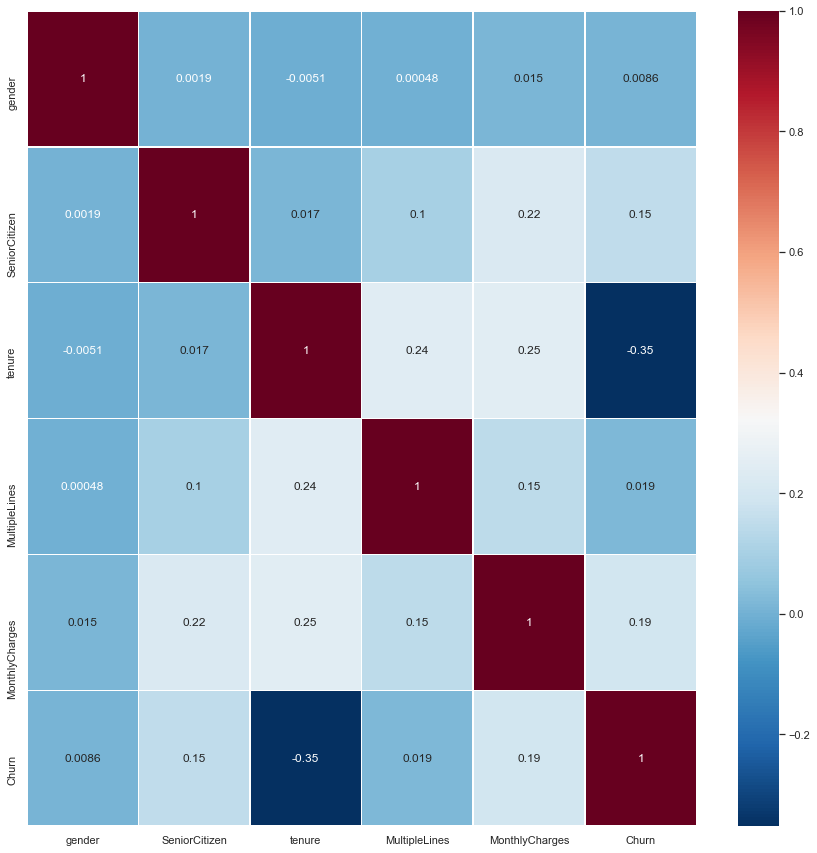

In [133]:
plt.figure(figsize = (15,15))
sns.heatmap(data_churn.corr(),annot =True, linewidth = 0.6,cmap ='RdBu_r')
plt.show()

In [ ]:
y = []